# Python to Quant


## Choice library when get data

Consider library list 

**Pandas Datareader**

> https://pypi.org/project/pandas-datareader/
- 2k start

**yfinance**

>https://pypi.org/project/yfinance/
- 8k star

I choice `yfinace`, cuz it is more descirbed from get data and more star of git

## Get Data and Draw Chart

start : 2022-01-01 00:00:00,end: 2023-02-28 00:00:00
yahoo finance df's columns : Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Dividends', 'Stock Splits'], dtype='object')


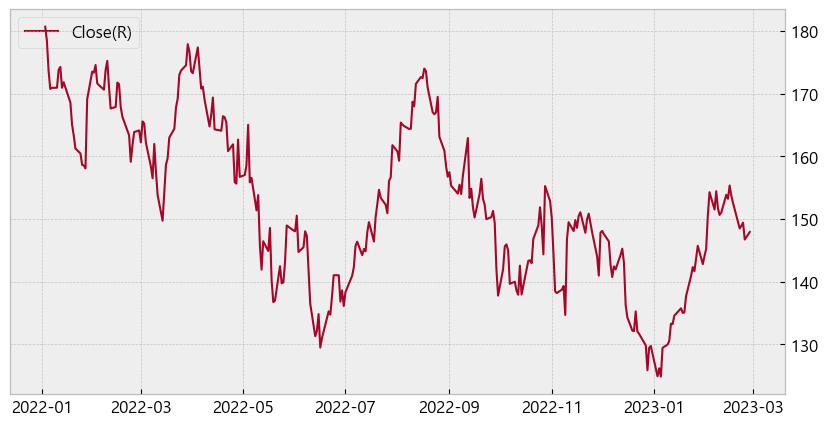

In [1]:
import os, sys
import pandas as pd
import numpy as np
import json
from datetime import datetime
sys.path.append('/mylib')
from method import *

df = get_yf_df('AAPL', datetime(2022,1,1), datetime(2023,2,28))
df.head(3)
draw_chart(dataframe=df, right="Close")
# draw_chart(dataframe=df, right="Open")
# draw_chart(dataframe=df, right="Volume")

## Set Strategy

### RSI, MACD 

by startegy set Position

In [2]:
macd = get_macd(df)
add_signal_df(macd, 'macd_oscillator', buy=0, sell = 0)

rsi = get_rsi(df)
add_signal_df(rsi, 'rsi', buy=40, sell = 60)

macd output_df : Index(['Close', 'macd', 'macd_signal', 'macd_oscillator'], dtype='object')
signal columns : Index(['Close', 'macd', 'macd_signal', 'macd_oscillator', 'trade', 'position',
       'position_chart'],
      dtype='object')
rsi output_df : Index(['Close', 'rsi'], dtype='object')
signal columns : Index(['Close', 'rsi', 'trade', 'position', 'position_chart'], dtype='object')


,Close,rsi,trade,position,position_chart
Date,,,,,
2022-01-03 00:00:00-05:00,180.683868,NaN,zero,,0
2022-01-04 00:00:00-05:00,178.390701,NaN,zero,zero_wait,0
2022-01-05 00:00:00-05:00,173.645538,NaN,zero,zero_wait,0
2022-01-06 00:00:00-05:00,170.746811,NaN,zero,zero_wait,0
2022-01-07 00:00:00-05:00,170.915558,NaN,zero,zero_wait,0
...,...,...,...,...,...
2023-02-21 00:00:00-05:00,148.479996,52.58,zero,zero_wait,0
2023-02-22 00:00:00-05:00,148.910004,53.32,zero,zero_wait,0
2023-02-23 00:00:00-05:00,149.399994,54.19,zero,zero_wait,0


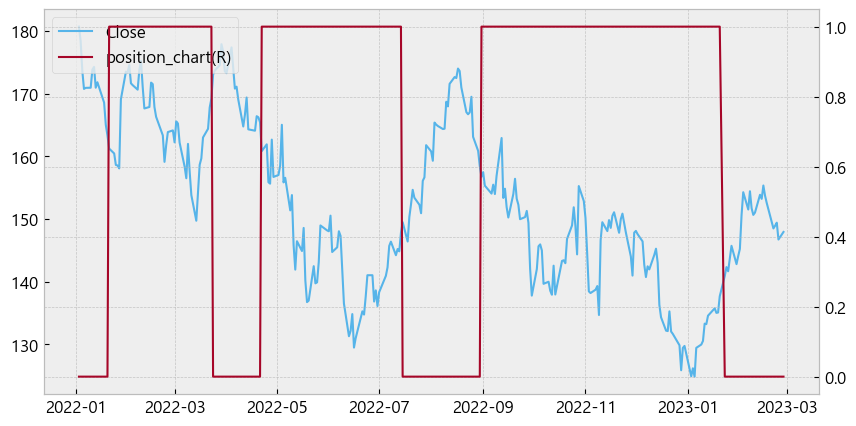

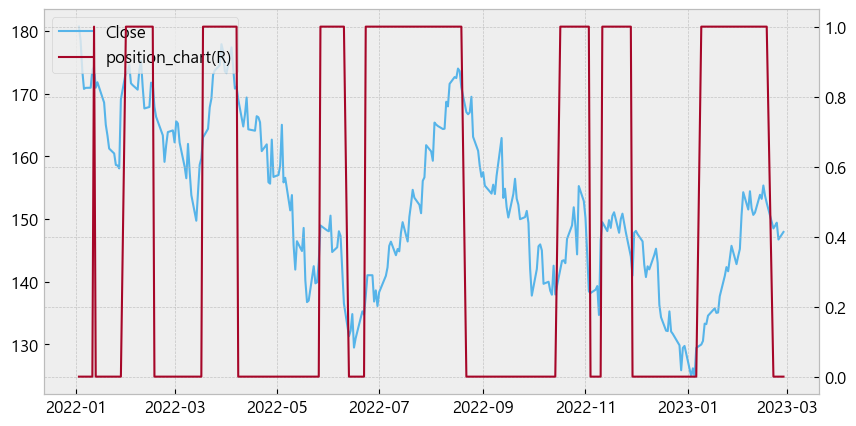

In [3]:
draw_chart(rsi, left='Close', right = 'position_chart')

draw_chart(macd, left = 'Close', right ='position_chart')


## Calculate Backtesting




result : {
   "CAGR": 8.24,
   "Accumulated": 9.54,
   "Average": 1.64,
   "Benchmark": -18.13,
   "Trade": 8,
   "Win": 3,
   "Hit ratio": 38.0,
   "Investment period": 420,
   "Sharpe": 29.71,
   "MDD": -17.34,
   "Benchmark MDD": -30.91
}
CAGR: -9.66%
Accumulated return: -10.59%
Average return: -3.37%
Benchmark return : -8.25%
Number of trades: 3
Number of win: 1
Hit ratio: 33.33%
Investment period: 1.1yrs
Sharpe ratio: -0.28
MDD: -27.92%
Benchmark MDD: -30.91%






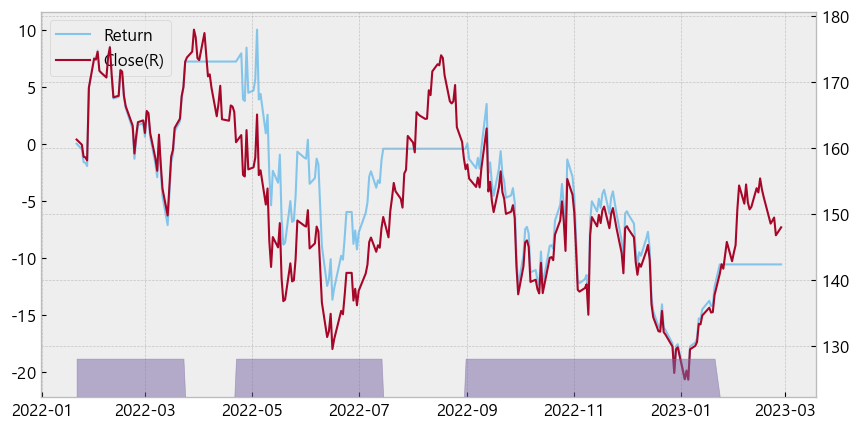

In [5]:
macd_eval, result = get_evaluate_column(macd, isPrint=False)
print(f'result : {json.dumps(result, indent=2)}\n-----\n')

rsi_eval, _ = get_evaluate_column(rsi)
draw_trade_results(rsi_eval)
